# Introduction

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
query = "SELECT * FROM sqlite_master WHERE type = 'table'"
cursor.execute(query).fetchall()


[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [2]:
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
query2 = "SELECT * FROM Facts LIMIT 5"
pd.read_sql_query(query2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Summary Statistics

In [4]:
query3 = '''
SELECT MIN(population) min_population,
MAX(population) max_population,
MIN(population_growth) min_population_growth,
MAX(population_growth) max_population_growth
FROM Facts
'''
pd.read_sql_query(query3, conn)

,min_population,max_population,min_population_growth,max_population_growth
0,0,7256490011,0.0,4.02


# Outliers

In [5]:
query4 = '''
SELECT *
FROM Facts
WHERE population == (SELECT MIN(population) FROM Facts)
'''
pd.read_sql_query(query4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
query5 = '''
SELECT *
FROM Facts
WHERE population == (SELECT MAX(population) FROM Facts)
'''
pd.read_sql_query(query5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Antarctica is the country with a population of 0 which backs up the information provided by the CIA Factbook. And according to the data, World is labeled or in the category country that is why it has a population of 7256490011.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f988a861908>,
      dtype=object)

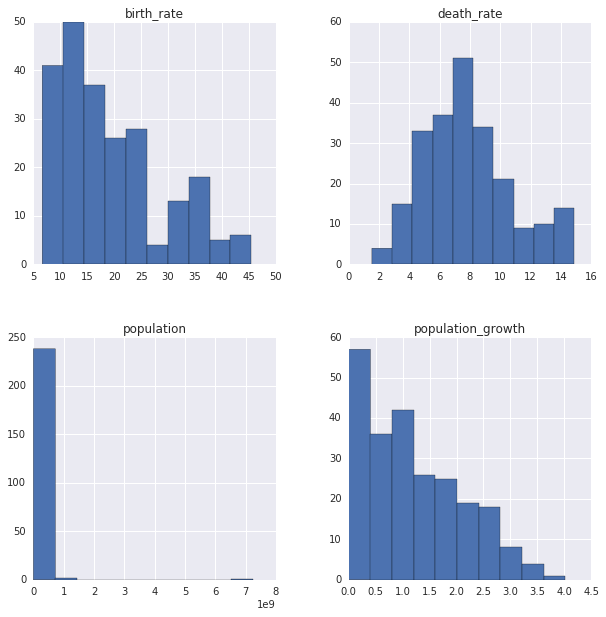

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

query6 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM Facts
WHERE population != ((SELECT MAX(population) FROM Facts) AND (SELECT MIN(population)FROM Facts))
'''
pd.read_sql_query(query6, conn).hist(ax=ax)

Ignoring the outlier rows (Antartica and World), generated a 2 by 2 grid of histograms for population, population_growth, birth_rate, death_rate for the table Facts provided by the data factbook.db

In [8]:
query7 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM Facts
WHERE population != ((SELECT MAX(population) FROM Facts) AND (SELECT MIN(population)FROM Facts))
'''
pd.read_sql_query(query7, conn)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


# Which countries have the highest population density?

In [9]:
query8 = '''
SELECT name, cast(population as float)/cast(area as float) density
FROM Facts
ORDER BY density DESC
'''
pd.read_sql_query(query8, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
